In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
cust_df = pd.read_csv('./02_동영상 연습예제/4장/santander-customer-satisfaction/train.csv', encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head()

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [4]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [5]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [6]:
# cust_df['var3'].replace(-999999, 2, inplace=True)
# cust_df.drop('ID', axis=1, inplace=True)

X_features = cust_df.iloc[:,:-1]
y_label = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 370)


In [7]:
y_label.head()

0    0
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=0)

train_cnt = y_train.count()
test_cnt = y_test.count()


In [9]:
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 370), 테스트 세트 Shape:(15204, 370)
학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [10]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc",
            eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print('Roc AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.799928	validation_1-auc:0.803548
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.802222	validation_1-auc:0.805222
[2]	validation_0-auc:0.80819	validation_1-auc:0.813162
[3]	validation_0-auc:0.8127	validation_1-auc:0.813243
[4]	validation_0-auc:0.81648	validation_1-auc:0.816979
[5]	validation_0-auc:0.816018	validation_1-auc:0.816629
[6]	validation_0-auc:0.816474	validation_1-auc:0.817776
[7]	validation_0-auc:0.818148	validation_1-auc:0.818464
[8]	validation_0-auc:0.81806	validation_1-auc:0.818295
[9]	validation_0-auc:0.817039	validation_1-auc:0.818087
[10]	validation_0-auc:0.818318	validation_1-auc:0.818749
[11]	validation_0-auc:0.818711	validation_1-auc:0.818521
[12]	validation_0-auc:0.818673	validation_1-auc:0.818516
[13]	validation_0-auc:0.819156	validation_1-auc:0.818998
[14]	validation_0-auc:0.819847	validation_1-auc:0.81999
[15

[141]	validation_0-auc:0.862121	validation_1-auc:0.842108
[142]	validation_0-auc:0.862233	validation_1-auc:0.842037
[143]	validation_0-auc:0.862292	validation_1-auc:0.842029
[144]	validation_0-auc:0.86231	validation_1-auc:0.842038
[145]	validation_0-auc:0.86237	validation_1-auc:0.842074
[146]	validation_0-auc:0.862753	validation_1-auc:0.841916
[147]	validation_0-auc:0.862986	validation_1-auc:0.841874
[148]	validation_0-auc:0.863074	validation_1-auc:0.841895
[149]	validation_0-auc:0.863099	validation_1-auc:0.841879
[150]	validation_0-auc:0.863176	validation_1-auc:0.841899
[151]	validation_0-auc:0.86327	validation_1-auc:0.841862
[152]	validation_0-auc:0.863311	validation_1-auc:0.841847
[153]	validation_0-auc:0.863418	validation_1-auc:0.841694
[154]	validation_0-auc:0.863512	validation_1-auc:0.841924
[155]	validation_0-auc:0.863618	validation_1-auc:0.841845
[156]	validation_0-auc:0.863784	validation_1-auc:0.841757
[157]	validation_0-auc:0.863833	validation_1-auc:0.841772
[158]	validation_

In [ ]:
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5,7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5, 0.75]}
gridcv = GridSearchCV(xgb_clf, param_grid = params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predcit_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

In [14]:
xgb_clf = XGBClassifier(n_estimators = 100, random_state=156, learning_rate = 0.02, max_depth = 5,
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03, n_jobs = -1)

xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_metric="auc",
           eval_set = [(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.800243	validation_1-auc:0.797783
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.822291	validation_1-auc:0.812463
[2]	validation_0-auc:0.822117	validation_1-auc:0.815945
[3]	validation_0-auc:0.828402	validation_1-auc:0.821034
[4]	validation_0-auc:0.829822	validation_1-auc:0.820944
[5]	validation_0-auc:0.824909	validation_1-auc:0.81848
[6]	validation_0-auc:0.826703	validation_1-auc:0.82005
[7]	validation_0-auc:0.829631	validation_1-auc:0.822255
[8]	validation_0-auc:0.829935	validation_1-auc:0.821643
[9]	validation_0-auc:0.830988	validation_1-auc:0.822128
[10]	validation_0-auc:0.831738	validation_1-auc:0.822957
[11]	validation_0-auc:0.832685	validation_1-auc:0.823926
[12]	validation_0-auc:0.832759	validation_1-auc:0.82531
[13]	validation_0-auc:0.83318	validation_1-auc:0.825274
[14]	validation_0-auc:0.833417	validation_1-auc:0.825442
[

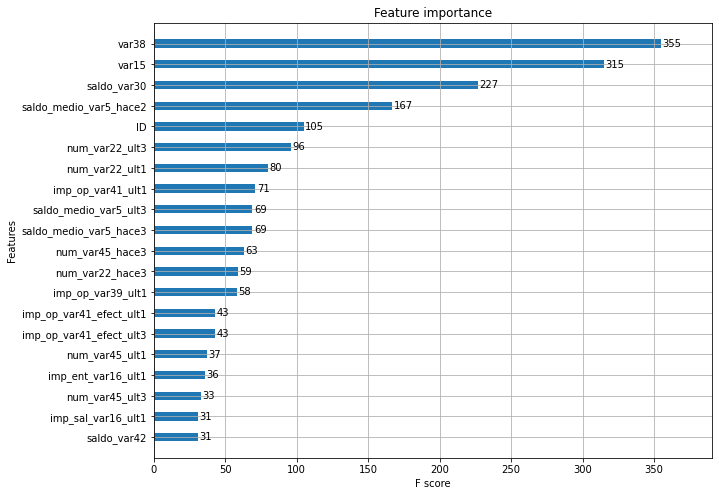

In [15]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

In [18]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817877	valid_0's binary_logloss: 0.165052
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.817734	valid_0's binary_logloss: 0.160082
[3]	valid_0's auc: 0.826884	valid_0's binary_logloss: 0.15638
[4]	valid_0's auc: 0.831068	valid_0's binary_logloss: 0.153526
[5]	valid_0's auc: 0.833904	valid_0's binary_logloss: 0.151299
[6]	valid_0's auc: 0.833958	valid_0's binary_logloss: 0.14942
[7]	valid_0's auc: 0.837599	valid_0's binary_logloss: 0.147953
[8]	valid_0's auc: 0.838157	valid_0's binary_logloss: 0.146734
[9]	valid_0's auc: 0.838744	valid_0's binary_logloss: 0.145611
[10]	valid_0's auc: 0.837898	valid_0's binary_logloss: 0.144866
[11]	valid_0's auc: 0.837722	valid_0's binary_logloss: 0.144086
[12]	valid_0's auc: 0.838849	valid_0's binary_logloss: 0.14345
[13]	valid_0's auc: 0.8383	valid_0's binary_logloss: 0.142856
[14]	valid_0's auc: 0.839259	valid_0's binary_logloss: 0.142416
[15]	valid_0's auc: 0.8384	valid_0's binary_logloss: 0.1

[138]	valid_0's auc: 0.835281	valid_0's binary_logloss: 0.140983
Early stopping, best iteration is:
[38]	valid_0's auc: 0.840053	valid_0's binary_logloss: 0.139532
ROC AUC: 0.8401


In [24]:
from sklearn.model_selection import GridSearchCV

LGBM_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves' : [32, 64],
          'max_depth' : [128, 160],
          'min_child_samples' : [60,100],
          'subsample' : [0.8, 1]}
gridcv = GridSearchCV(LGBM_clf, param_grid = params)

LGBM_clf.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
             eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, LGBM_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))
             

[1]	training's auc: 0.823542	training's binary_logloss: 0.15599	valid_1's auc: 0.817877	valid_1's binary_logloss: 0.165052
Training until validation scores don't improve for 30 rounds
[2]	training's auc: 0.827887	training's binary_logloss: 0.150497	valid_1's auc: 0.817734	valid_1's binary_logloss: 0.160082
[3]	training's auc: 0.838297	training's binary_logloss: 0.146552	valid_1's auc: 0.826884	valid_1's binary_logloss: 0.15638
[4]	training's auc: 0.843298	training's binary_logloss: 0.14341	valid_1's auc: 0.831068	valid_1's binary_logloss: 0.153526
[5]	training's auc: 0.846201	training's binary_logloss: 0.140902	valid_1's auc: 0.833904	valid_1's binary_logloss: 0.151299
[6]	training's auc: 0.847158	training's binary_logloss: 0.138811	valid_1's auc: 0.833958	valid_1's binary_logloss: 0.14942
[7]	training's auc: 0.851366	training's binary_logloss: 0.13695	valid_1's auc: 0.837599	valid_1's binary_logloss: 0.147953
[8]	training's auc: 0.853591	training's binary_logloss: 0.135299	valid_1's a

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [25]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, subsample=0.8, min_child_samples=100, max_depth=128)

evals= [(X_test, y_test)]

lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.818835	valid_0's binary_logloss: 0.165119
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.820752	valid_0's binary_logloss: 0.159978
[3]	valid_0's auc: 0.828507	valid_0's binary_logloss: 0.156308
[4]	valid_0's auc: 0.83378	valid_0's binary_logloss: 0.153379
[5]	valid_0's auc: 0.837554	valid_0's binary_logloss: 0.151078
[6]	valid_0's auc: 0.838158	valid_0's binary_logloss: 0.149194
[7]	valid_0's auc: 0.839522	valid_0's binary_logloss: 0.147594
[8]	valid_0's auc: 0.840293	valid_0's binary_logloss: 0.146314
[9]	valid_0's auc: 0.840526	valid_0's binary_logloss: 0.145185
[10]	valid_0's auc: 0.84088	valid_0's binary_logloss: 0.144195
[11]	valid_0's auc: 0.841402	valid_0's binary_logloss: 0.143481
[12]	valid_0's auc: 0.841863	valid_0's binary_logloss: 0.142753
[13]	valid_0's auc: 0.842266	valid_0's binary_logloss: 0.142188
[14]	valid_0's auc: 0.841986	valid_0's binary_logloss: 0.141685
[15]	valid_0's auc: 0.842149	valid_0's binary_logloss